# Исследование рынка компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.

План работы:
1) Обработать данные (1. избавиться от пропусков, где возможно; 2. изменить типы данных, где это нужно)

2) Провести анализ данных (узнать, какие же закономерности определяют успешность игры)

3) Изучить особенности пользователей разных регионов

4) Проверить несколько гипотез

### Открываю файл с данными и изучаю общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
old_data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


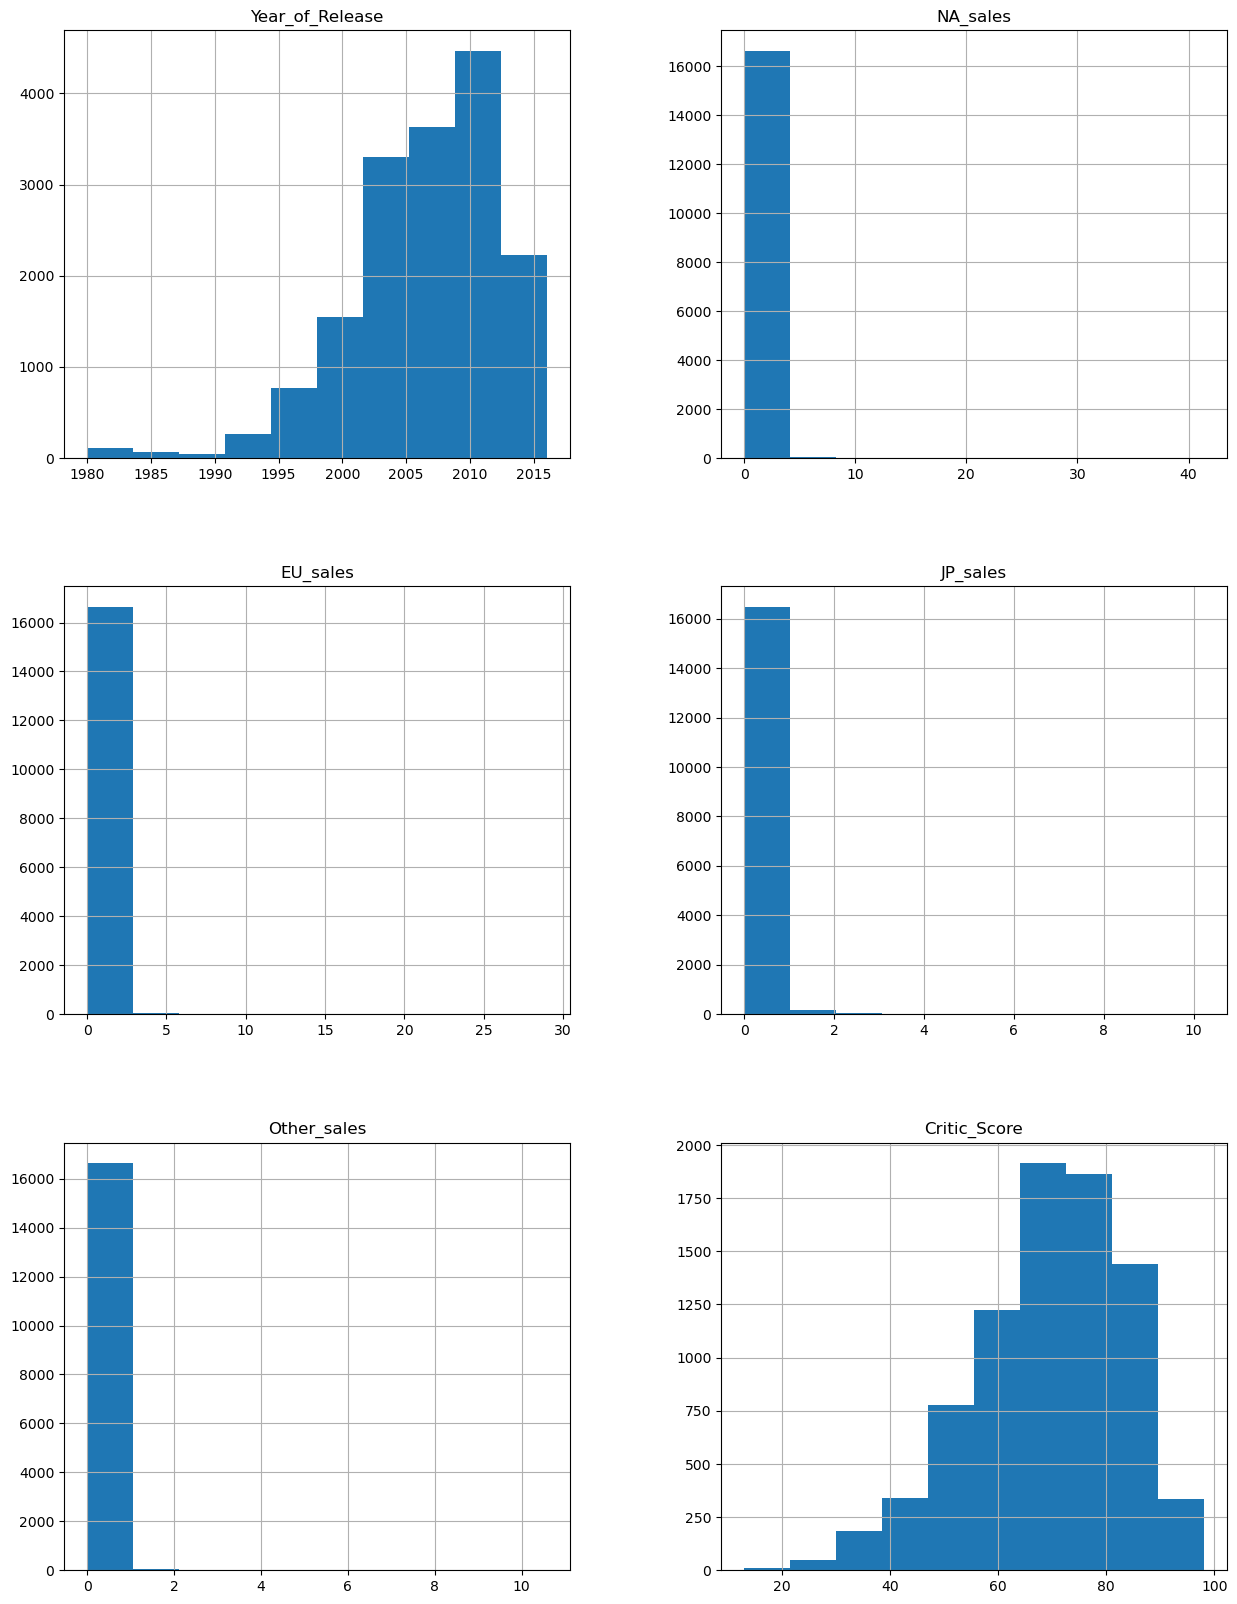

In [5]:
data.hist(figsize=(15, 20))
plt.show()

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Промежуточный вывод**

В столбцах оценок критиков, пользователей и в рейтинге присутствует большое количество пропусков. Некоторые колонки имеют не тот тип данных.
</div>
</div>

### Предобработка данных

#### Замена названий столбцов

In [6]:
data.columns = data.columns.str.lower()

#### Удаление пропусков

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
data.loc[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data = data.loc[data['name'].isna() == False]

In [10]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [11]:
data = data.dropna(subset=['year_of_release'])

In [12]:
data.shape[0] / old_data.shape[0]

0.9837870176488184

In [13]:
data.loc[data['rating'].isna() == True].sort_values(by='na_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10760,Virtual Pro Wrestling,PS,1996.0,Fighting,0.00,0.00,0.09,0.01,NaN,NaN,NaN
10772,The Idolmaster: Platinum Stars,PS4,2016.0,Simulation,0.00,0.00,0.10,0.00,NaN,NaN,NaN
10773,Jikkyou Powerful Pro Yakyuu 2013,PSV,2013.0,Sports,0.00,0.00,0.10,0.00,NaN,NaN,NaN
10779,Tokimeki Memorial: Taisen Pazurudama,PS,1996.0,Puzzle,0.00,0.00,0.09,0.01,NaN,NaN,NaN


<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Комментарий**
    
Удалил 2 строки без имени и жанра игр.

Заменил в столбце "user_score" значение 'tbd' на пропуск, чтобы можно было изменить тип данных и работать со столбцом как с цифрами. По сути 'tbd' и значит что оценки нет, либо она будет позже.
    
Удалил данные без года выпуска, т.к. год выпуска довольно сложно восстановить, а как-то оценить его сразу для всех игр не получится.
    
С остальными пропусками ничего не сделать, т.к. рейтинги пользователей, критиков или ассоциации никак не оценить.
    
Пропуски в данных могли быть обусловленны тем, что данные игры не имели бюджета на рекламу и поэтому о них просто никто не слышал.
    
Хотя такие игры как марио или тетрис были очень известны. С ними не совсем понятно почему оценок нет. Причина может быть в том что ESRB основан в 1994, то есть после выхода этих игр. Metacritic, например, был основан только в 2001 году, то есть оценки пользователей и критиков стали понастоящему массовыми уже после 2001.
</div>
</div>

#### Изменение типов данных

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [15]:
data[['name', 'platform', 'genre', 'rating']] = data[['name', 'platform', 'genre', 'rating']].astype('str')

In [16]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [17]:
data['user_score'] = data['user_score'].astype('float')

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Промежуточный вывод**
    
Привел столбцы с текстом к 'str'(с 'nan' в 'rating', если понадобится, позже разберусь).
    
'year_of_release' привел к 'int', потому что года это целые числа.
    
'user_score' это числа(необязательно целые) от 0 до 10, поэтому 'float'.
</div>
</div>

### Провожу исследовательский анализ данных

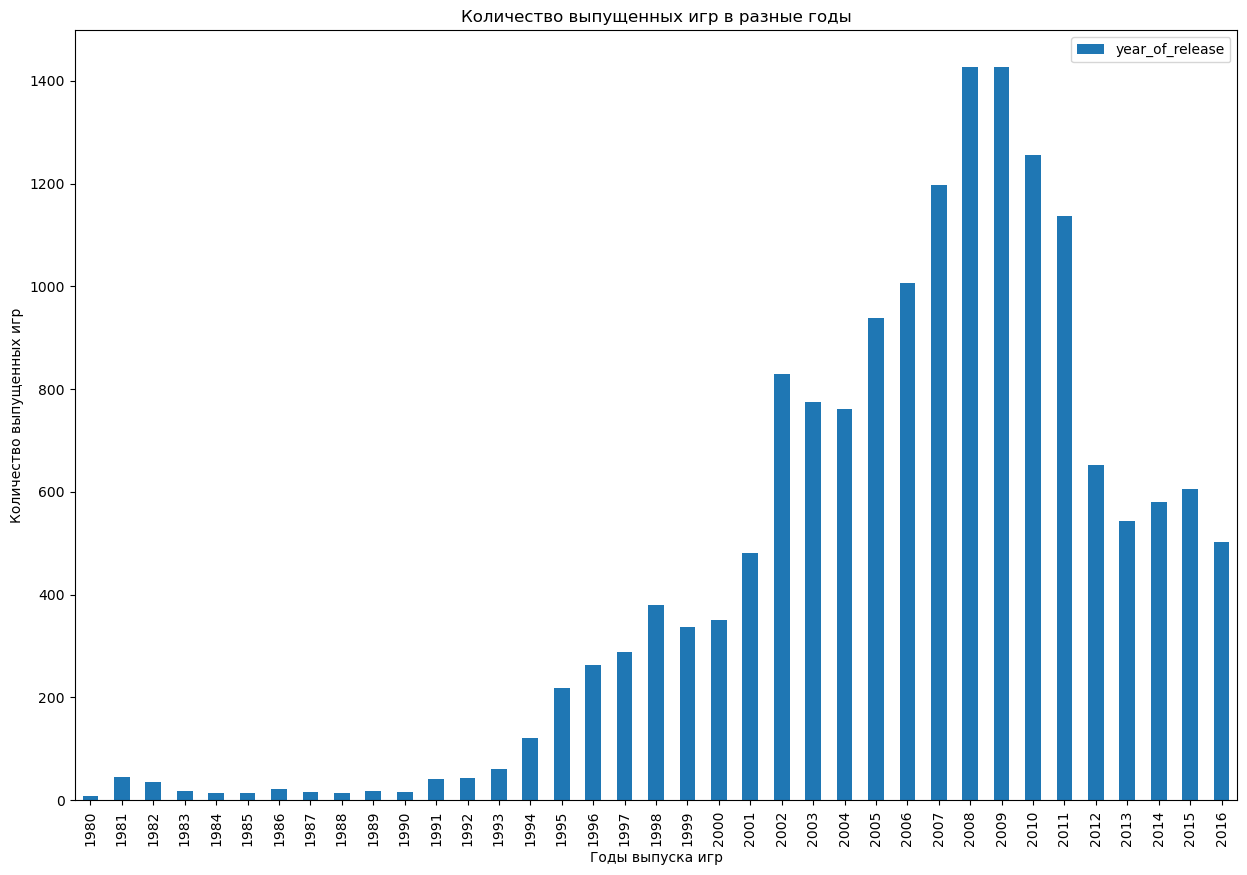

In [19]:
(data
 .groupby('year_of_release').agg({'year_of_release' : 'count'})
 .plot(kind='bar', figsize=(15, 10), xlabel='Годы выпуска игр',
       ylabel='Количество выпущенных игр', title='Количество выпущенных игр в разные годы')
)
plt.show()

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Комментарий**
    
Важны ли данные за все периоды?
    
Думаю, данными до 1994 спокойно можно пренебречь, их совсем мало, потому что это только начало существования видеоигр, компьютеры и приставки есть далеко не у всех и мало кто еще слышал про компьютерные игры.
</div>
</div>

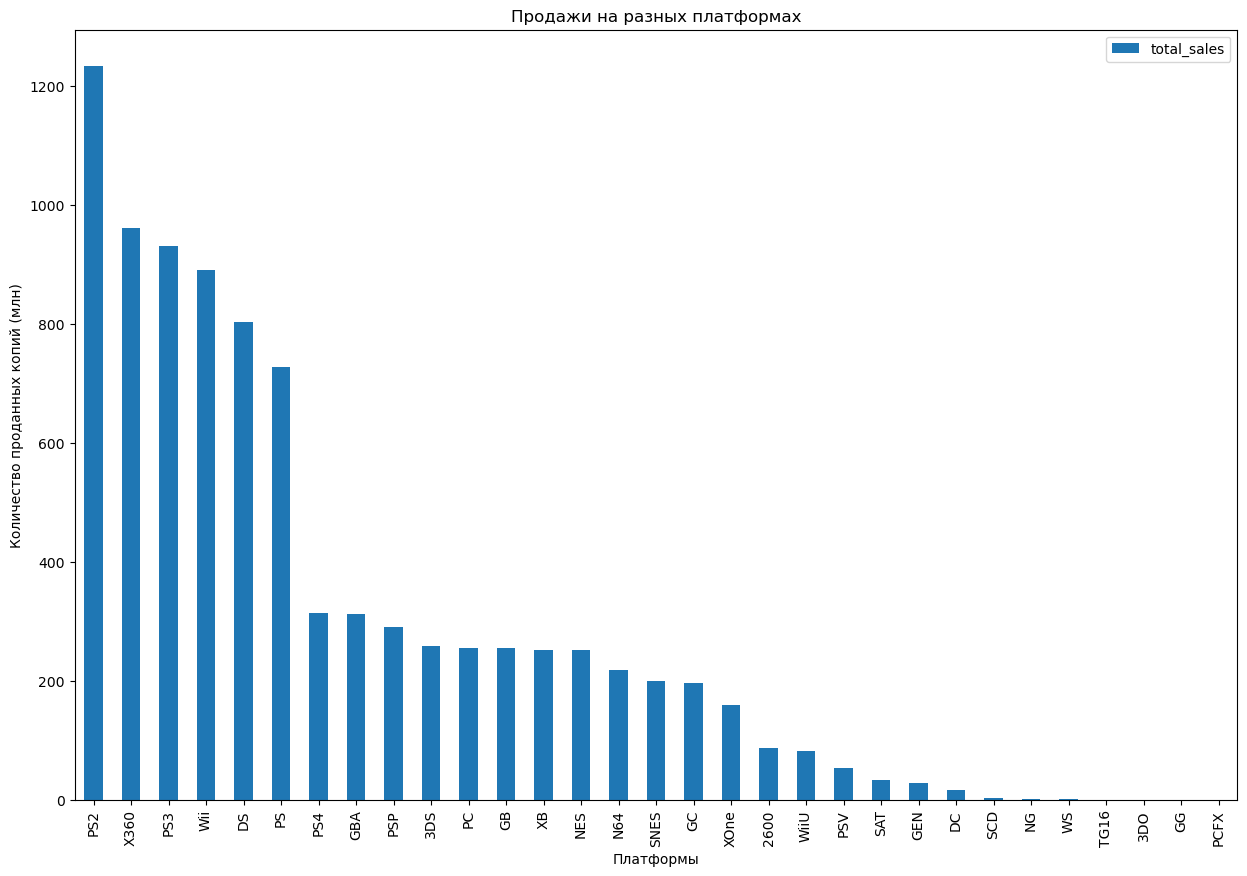

In [20]:
(data.groupby('platform')
 .agg({'total_sales' : 'sum'})
 .sort_values(by='total_sales', ascending=False)
 .plot(kind='bar', figsize=(15, 10), xlabel='Платформы',
       ylabel='Количество проданных копий (млн)', title='Продажи на разных платформах')
)
plt.show()

In [21]:
data.groupby('platform').agg({'total_sales' : 'sum'}).quantile([0.25,0.5,0.75])

,total_sales
0.25,22.150
0.50,200.040
0.75,301.205


In [22]:
platforms = data.groupby('platform').agg({'total_sales' : 'sum'})
top_platforms = platforms.loc[platforms['total_sales'] > 302]

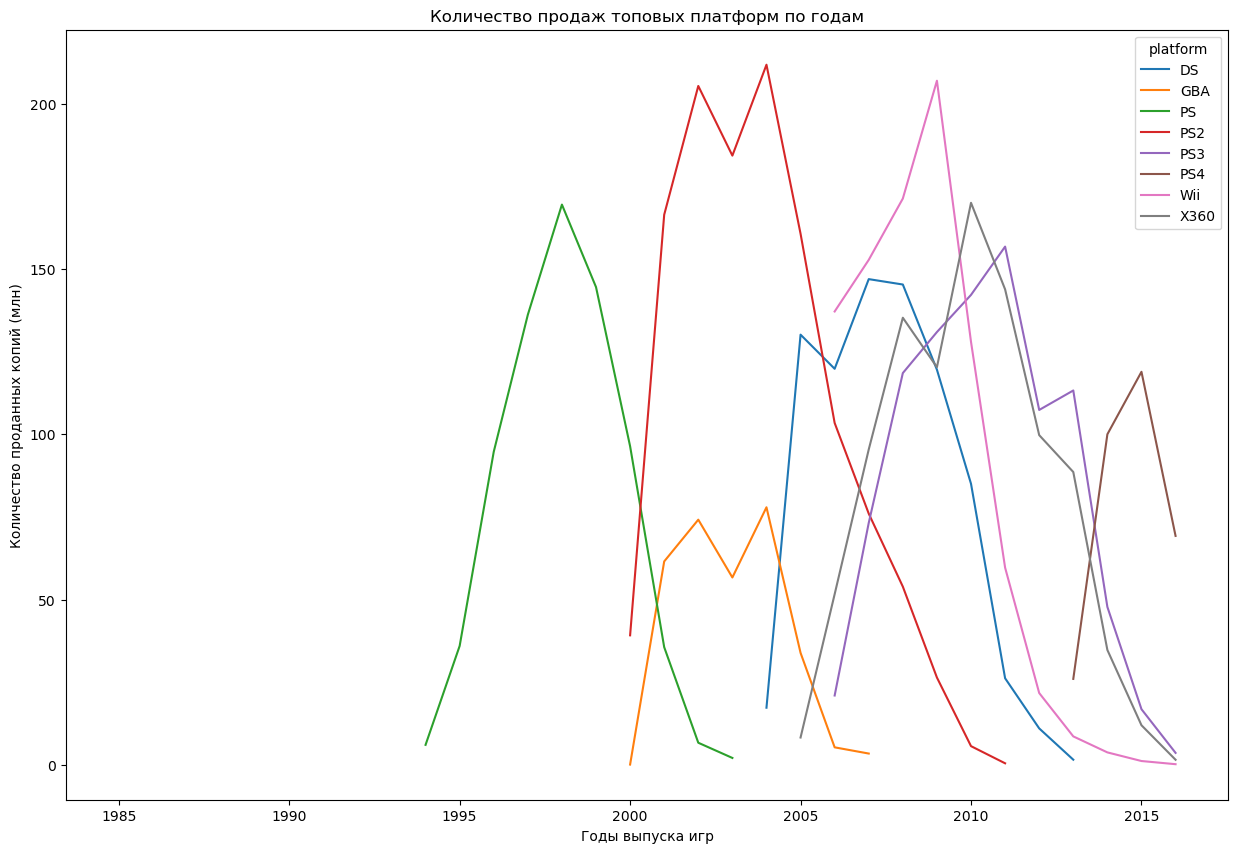

In [23]:
(data
 .query('platform in @top_platforms.index')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(figsize=(15, 10), xlabel='Годы выпуска игр',
       ylabel='Количество проданных копий (млн)', title='Количество продаж топовых платформ по годам')
)
plt.show()

In [24]:
(data
 .query('platform in @top_platforms.index')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .count()
 .mean()
)

9.875

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Комментарий**
    
Для расчёта характерного срока появления и исчезновения новых платформ убрал 'PC', т.к. он особый случай. ПК имеет возможность обновляться, поэтому он не может исчезнуть.
    
Срок жизни платформы вышел примерно 10 лет, думаю, это похоже на правду.
</div>
</div>

In [25]:
data = data.loc[data['year_of_release'] >= 2013]

In [26]:
data.shape[0]/old_data.shape[0]

0.13359258151361053

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Комментарий**
    
Исходя из срока жизни платформы можно выбрать актуальный период последние 10 лет. Хотя прогноз на прогноз на 2017 год, как мне кажется, потребуются только данные за последние 5 лет(т.к. на платформы, которым больше 5 лет, уже перестают выпускать игры, потому что их заменяют новые, графика и возможности на которых на порядок лучше). Тогда я возьму данные с 2013 года, когда релизнули ps4 и xbox one.
</div>
</div>

In [27]:
modern_platforms = data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
modern_platforms

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


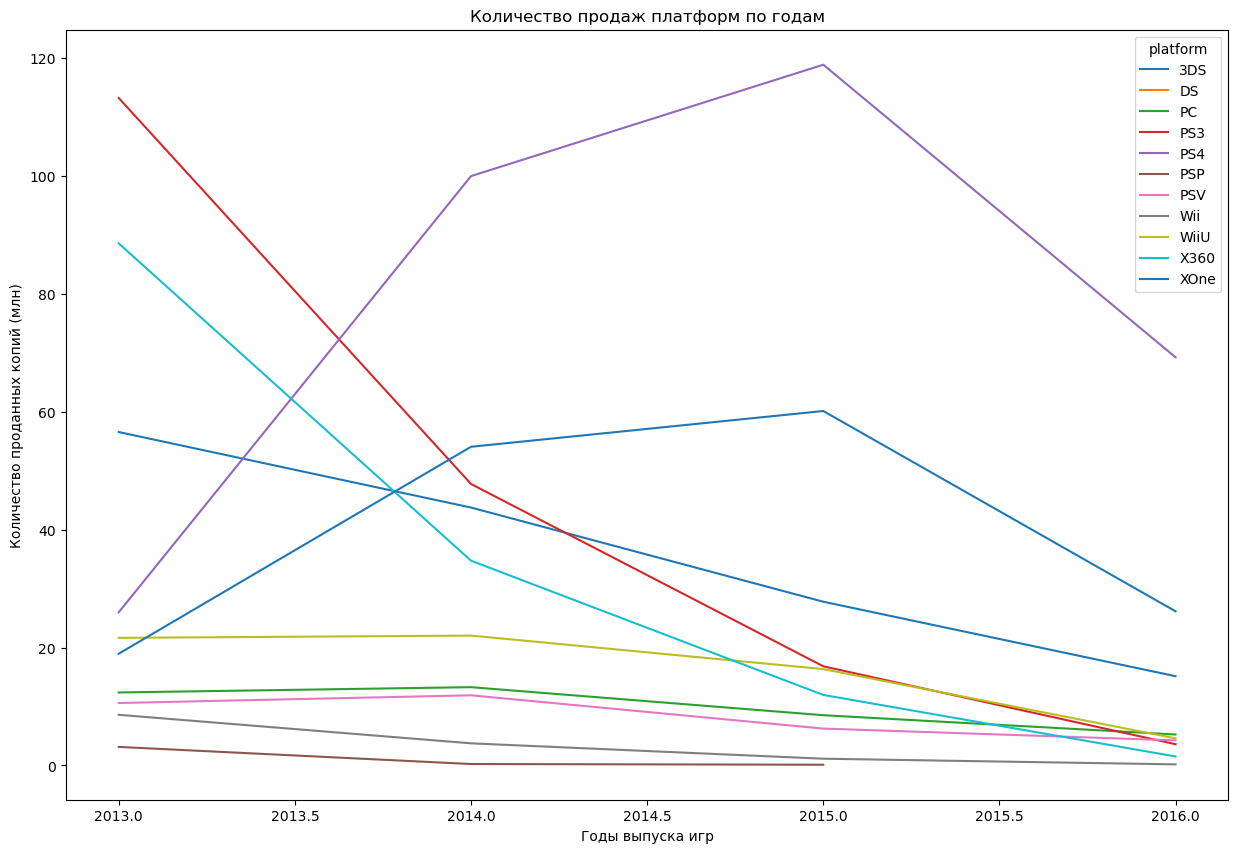

In [28]:
modern_platforms.plot(figsize=(15, 10), xlabel='Годы выпуска игр', 
                      ylabel='Количество проданных копий (млн)', title='Количество продаж платформ по годам')
plt.show()

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Комментарий**

Данные за 2016 год неполные. Поэтому буду выбирать прибыльные платформы по предыдущим годам. Потенциально прибыльные платформы Xbox One и PS4, может быть WiiU и PC(но с ПК как-то странно, слишком маленькие цифры продаж для него). PS3, PSV, Xbox360, Wii, 3DS уже отжили своё.
    
</div>
</div>

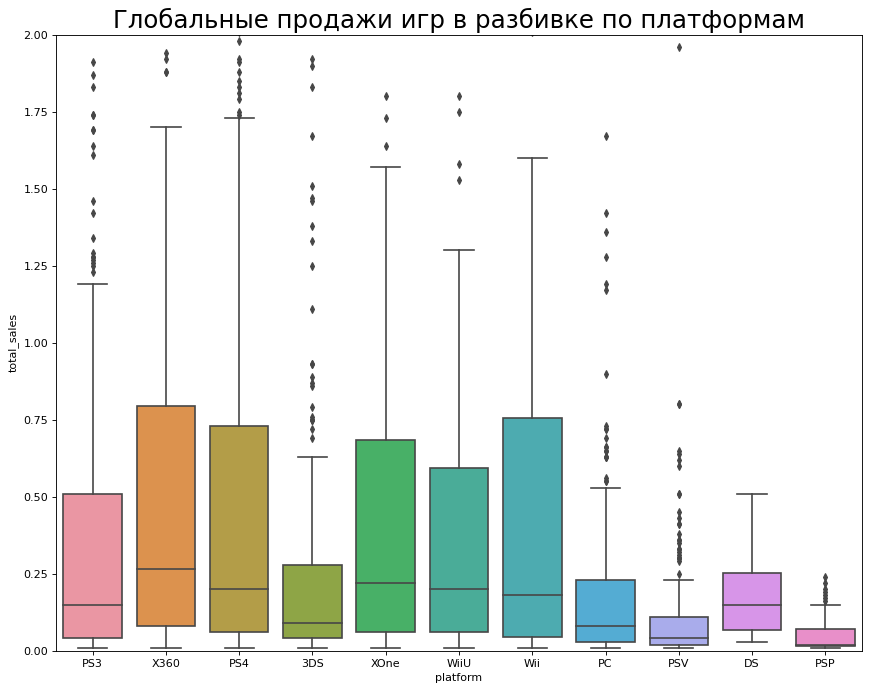

In [29]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='platform', y='total_sales', data=data, notch=False)

plt.title('Глобальные продажи игр в разбивке по платформам', fontsize=22)
plt.ylim(0, 2)
plt.show()

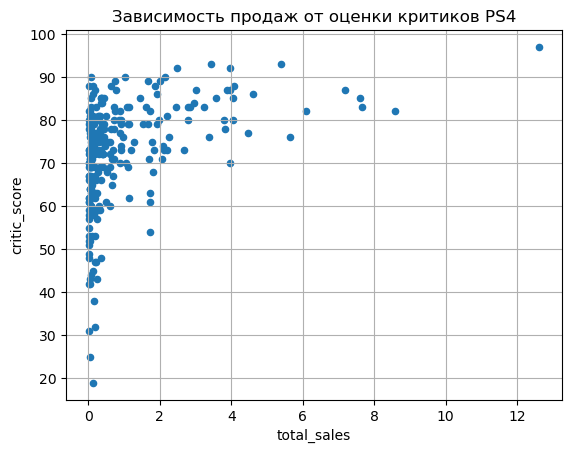

In [30]:
(data
 .loc[data['platform'] == 'PS4']
 .plot(x='total_sales', y='critic_score', kind='scatter', grid=True, title='Зависимость продаж от оценки критиков PS4')
)
plt.show()

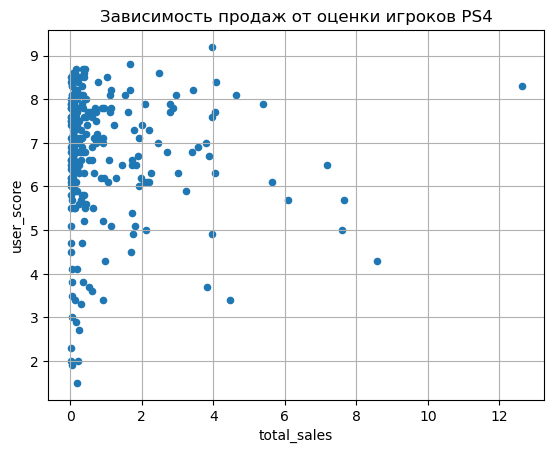

In [31]:
(data
 .loc[data['platform'] == 'PS4']
 .plot(x='total_sales', y='user_score', kind='scatter', grid=True, title='Зависимость продаж от оценки игроков PS4')
)
plt.show()

In [32]:
print('Корреляция продаж от оценки критиков PS4',
      data.loc[data['platform'] == 'PS4', 'total_sales'].corr(data.loc[data['platform'] == 'PS4', 'critic_score']))
print('Корреляция продаж от оценки игроков PS4',
      data.loc[data['platform'] == 'PS4', 'total_sales'].corr(data.loc[data['platform'] == 'PS4', 'user_score']))

Корреляция продаж от оценки критиков PS4 0.406567902061781
Корреляция продаж от оценки игроков PS4 -0.031957110204556424


<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Комментарий**

На графике зависимости с продаж от оценки критиков видна явная зависимость, коэффициент корреляции в 40% это подтверждает. А на графике продаж от оценки игроков такой явной зависимости не видно, но можно заметить, что продажи игр с малым рейтингом гораздо ниже, чем продажи игр с большим рейтингом, странно, что корреляция получилась отрицательной.
</div>
</div>

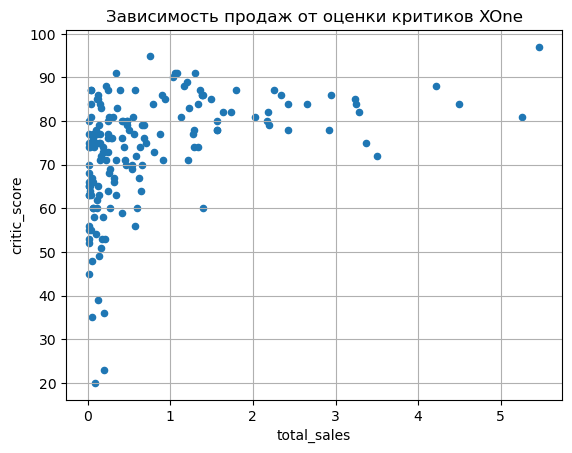

In [33]:
(data
 .loc[data['platform'] == 'XOne']
 .plot(x='total_sales', y='critic_score', kind='scatter', grid=True, title='Зависимость продаж от оценки критиков XOne')
)
plt.show()

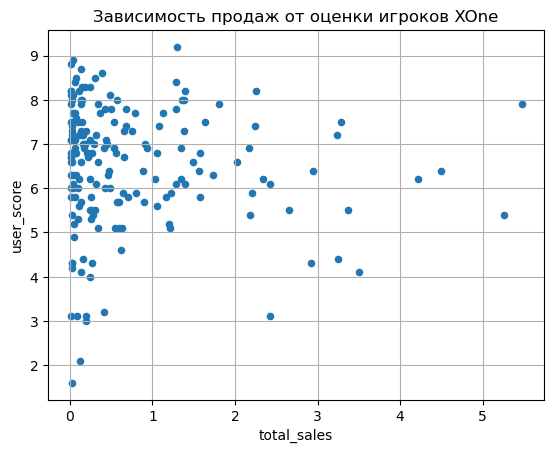

In [34]:
(data
 .loc[data['platform'] == 'XOne']
 .plot(x='total_sales', y='user_score', kind='scatter', grid=True, title='Зависимость продаж от оценки игроков XOne')
)
plt.show()

In [35]:
print('Корреляция продаж от оценки критиков XOne',
      data.loc[data['platform'] == 'XOne', 'total_sales'].corr(data.loc[data['platform'] == 'XOne', 'critic_score']))
print('Корреляция продаж от оценки игроков XOne',
      data.loc[data['platform'] == 'XOne', 'total_sales'].corr(data.loc[data['platform'] == 'XOne', 'user_score']))

Корреляция продаж от оценки критиков XOne 0.41699832800840175
Корреляция продаж от оценки игроков XOne -0.06892505328279412


<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Комментарий**

Похоже на PS4.
</div>
</div>

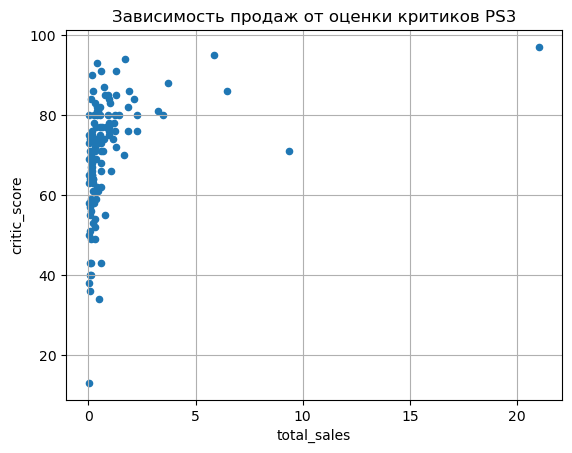

In [36]:
(data
 .loc[data['platform'] == 'PS3']
 .plot(x='total_sales', y='critic_score', kind='scatter', grid=True, title='Зависимость продаж от оценки критиков PS3')
)
plt.show()

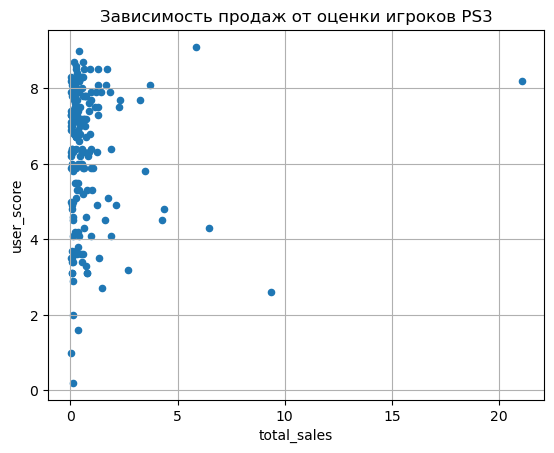

In [37]:
(data
 .loc[data['platform'] == 'PS3']
 .plot(x='total_sales', y='user_score', kind='scatter', grid=True, title='Зависимость продаж от оценки игроков PS3')
)
plt.show()

In [38]:
print('Корреляция продаж от оценки критиков PS3',
      data.loc[data['platform'] == 'PS3', 'total_sales'].corr(data.loc[data['platform'] == 'PS3', 'critic_score']))
print('Корреляция продаж от оценки игроков PS3',
      data.loc[data['platform'] == 'PS3', 'total_sales'].corr(data.loc[data['platform'] == 'PS3', 'user_score']))

Корреляция продаж от оценки критиков PS3 0.3342853393371919
Корреляция продаж от оценки игроков PS3 0.0023944027357566925


<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Комментарий**

Корреляция стала меньше, но это может быть связано с тем, что игра выходит сразу на 2 платформы, PS4 и PS3, и люди покупают её на PS4.
</div>
</div>

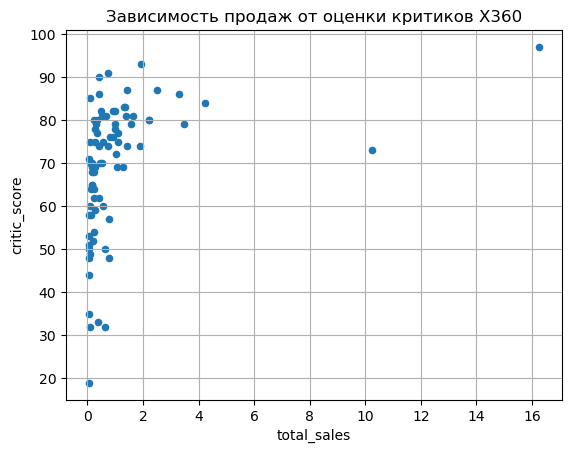

In [39]:
(data
 .loc[data['platform'] == 'X360']
 .plot(x='total_sales', y='critic_score', kind='scatter', grid=True, title='Зависимость продаж от оценки критиков X360')
)
plt.show()

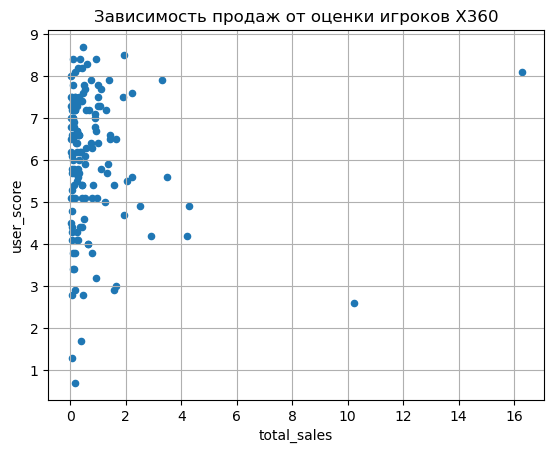

In [40]:
(data
 .loc[data['platform'] == 'X360']
 .plot(x='total_sales', y='user_score', kind='scatter', grid=True, title='Зависимость продаж от оценки игроков X360')
)
plt.show()

In [41]:
print('Корреляция продаж от оценки критиков X360',
      data.loc[data['platform'] == 'X360', 'total_sales'].corr(data.loc[data['platform'] == 'X360', 'critic_score']))
print('Корреляция продаж от оценки игроков X360',
      data.loc[data['platform'] == 'X360', 'total_sales'].corr(data.loc[data['platform'] == 'X360', 'user_score']))

Корреляция продаж от оценки критиков X360 0.3503445460228664
Корреляция продаж от оценки игроков X360 -0.011742185147181342


<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Комментарий**

Так же как для PS3.
</div>
</div>

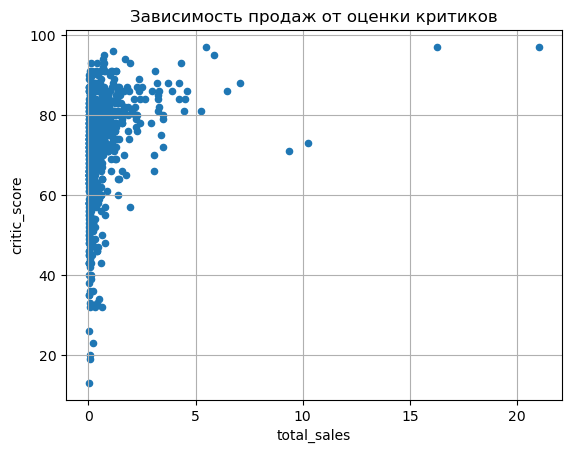

In [42]:
(data
 .loc[data['platform'] != 'PS4']
 .plot(x='total_sales', y='critic_score', kind='scatter', grid=True, title='Зависимость продаж от оценки критиков')
)
plt.show()

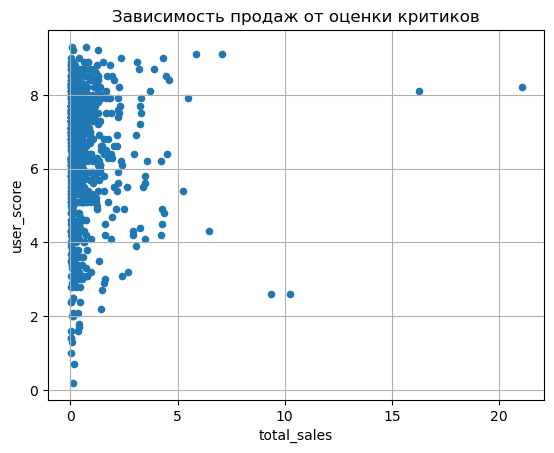

In [43]:
(data
 .loc[data['platform'] != 'PS4']
 .plot(x='total_sales', y='user_score', kind='scatter', grid=True, title='Зависимость продаж от оценки критиков')
)
plt.show()

In [44]:
print('Корреляция продаж от оценки критиков',
      data['total_sales'].loc[data['platform'] != 'PS4'].corr(data['critic_score'].loc[data['platform'] != 'PS4']))
print('Корреляция продаж от оценки игроков',
      data['total_sales'].loc[data['platform'] != 'PS4'].corr(data['user_score'].loc[data['platform'] != 'PS4']))

Корреляция продаж от оценки критиков 0.2812510848217571
Корреляция продаж от оценки игроков -0.0011216242093378518


<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Комментарий**

Для общей зависимости сделал только исключение PS4, не вижу повода ожидать чего-то необычного от других трех платформ.
</div>
</div>

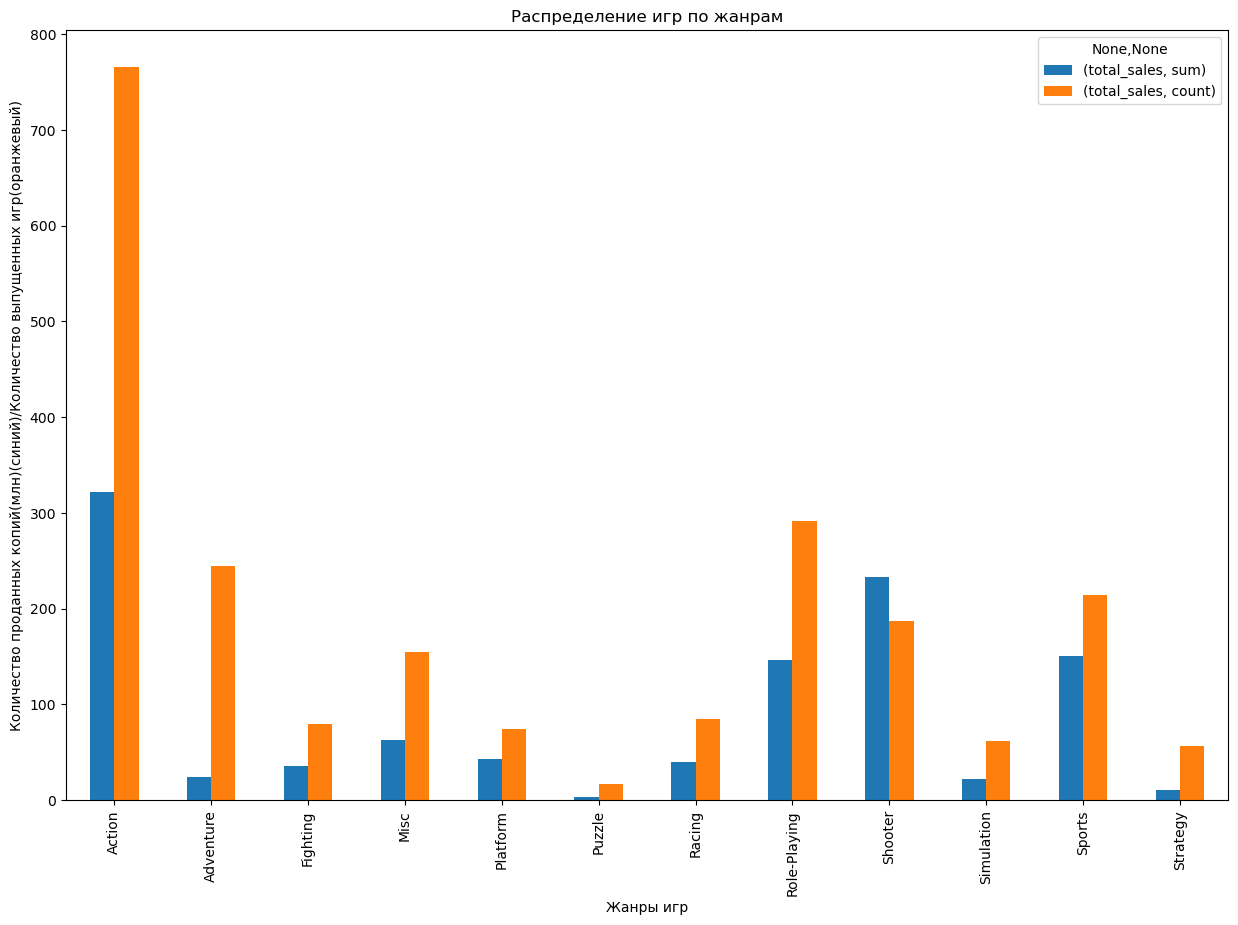

In [45]:
(data
 .groupby('genre')
 .agg({'total_sales' : ['sum', 'count']})
 .plot(kind='bar', figsize=(15, 10), xlabel='Жанры игр',
       ylabel='Количество проданных копий(млн)(синий)/Количество выпущенных игр(оранжевый)',
      title='Распределение игр по жанрам')
)
plt.show()

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Комментарий**

Исходя из графика самые прибыльные игры это шутеры, платформеры спортивные симмуляторы, гонки и ролевые игры. Самые неприбыльные - стратегии, адвенчуры и пазлы. 
</div>
</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Промежуточный вывод**

Проанализировав данные, был выбран актуальный период для того, с помощью которого можно построить прогноз на 2017 год. Определены потенциально прибыльные платформы - Xbox One и PS4. Установлены самые прибыльные жанры игр - шутеры, платформеры спортивные симмуляторы, гонки и ролевые игры.
</div>
</div>

### Составляю портрет пользователя каждого региона

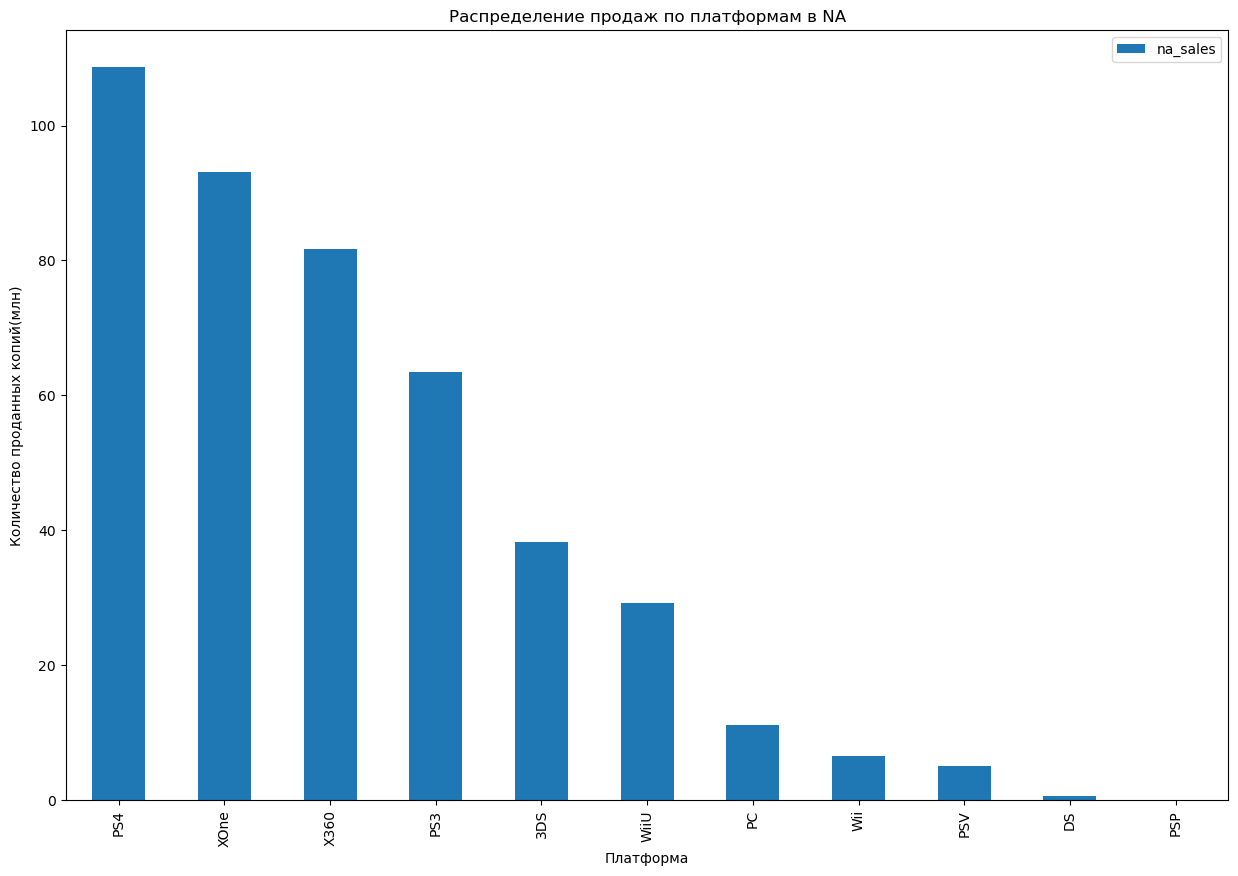

In [46]:
(data
 .pivot_table(index='platform', values=['na_sales'], aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 .plot(kind='bar', figsize=(15, 10), xlabel='Платформа', ylabel='Количество проданных копий(млн)',
      title='Распределение продаж по платформам в NA')
)
plt.show()

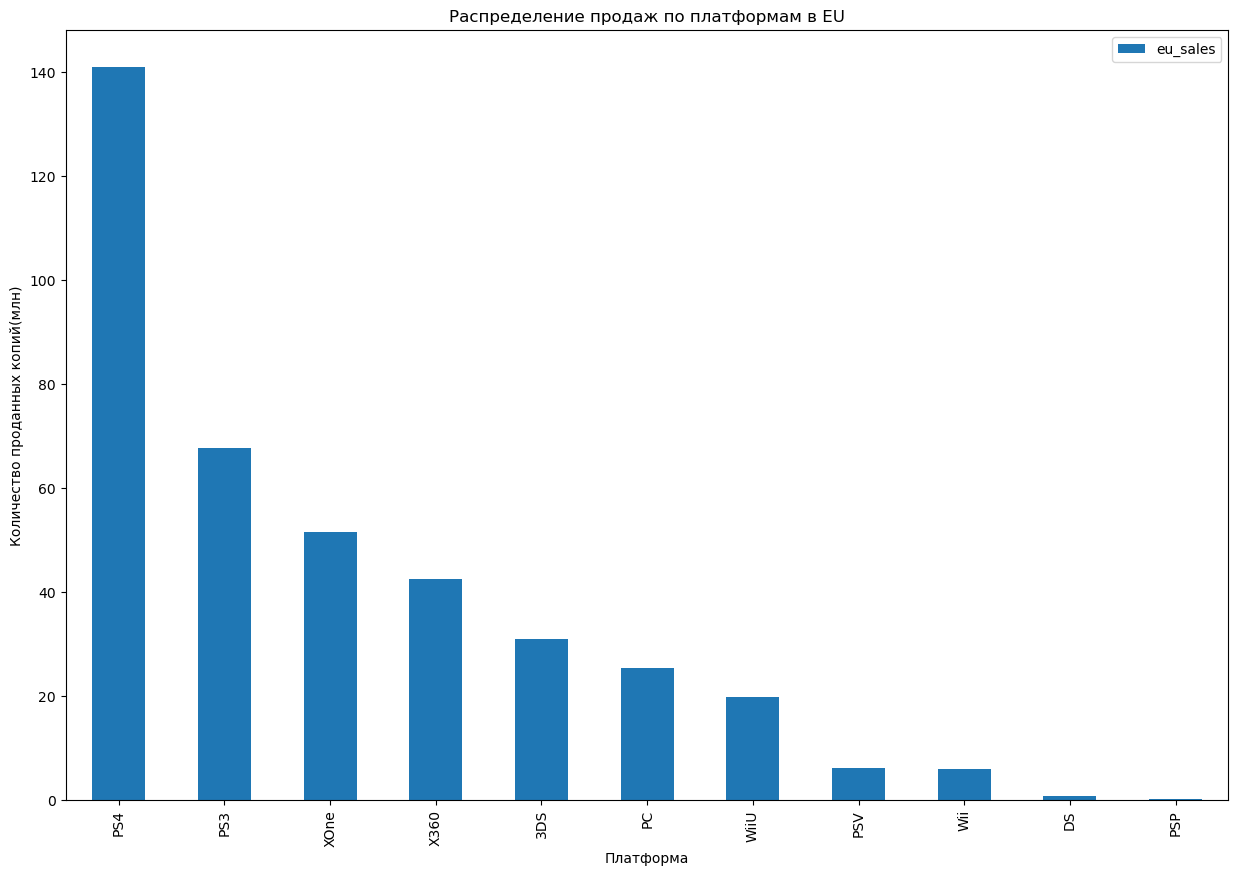

In [47]:
(data
 .pivot_table(index='platform', values=['eu_sales'], aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 .plot(kind='bar', figsize=(15, 10), xlabel='Платформа', ylabel='Количество проданных копий(млн)',
      title='Распределение продаж по платформам в EU')
)
plt.show()

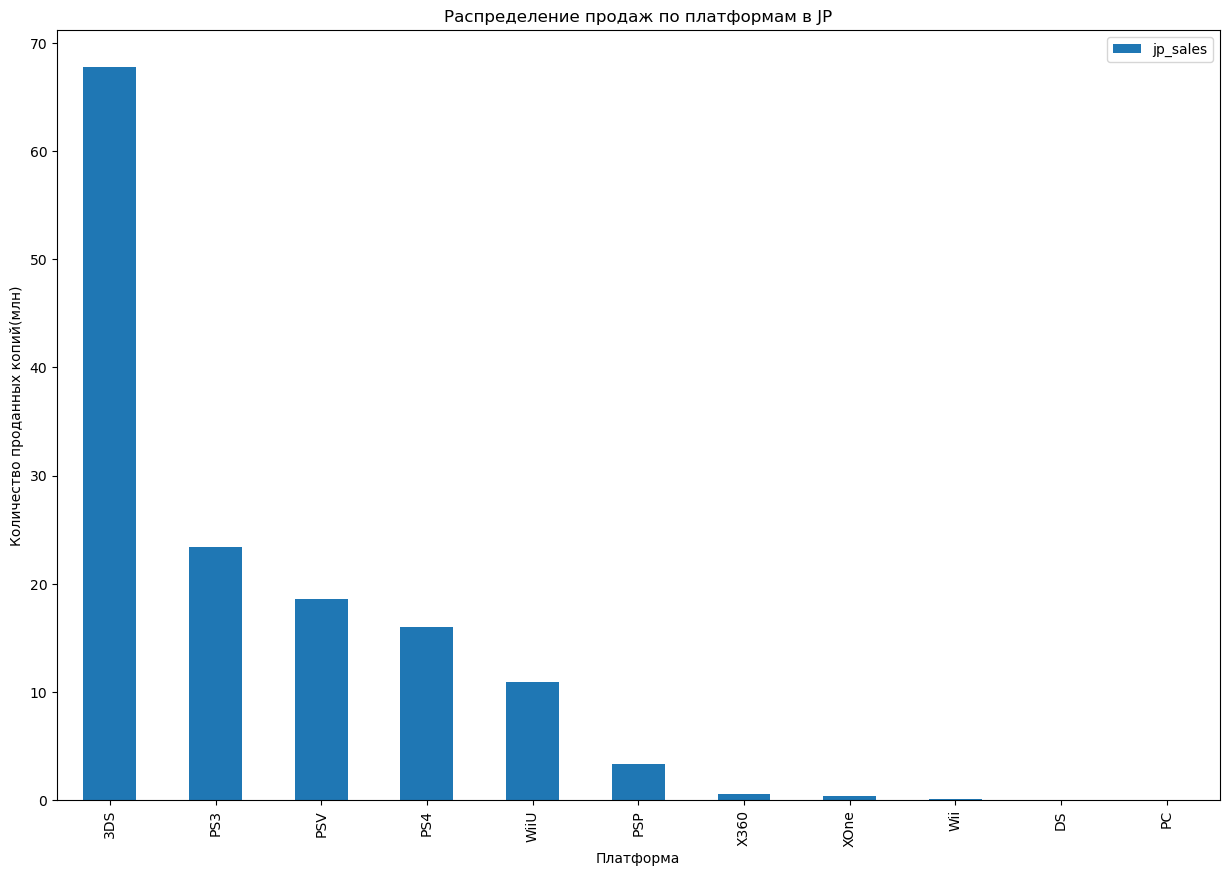

In [48]:
(data
 .pivot_table(index='platform', values=['jp_sales'], aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .plot(kind='bar', figsize=(15, 10), xlabel='Платформа', ylabel='Количество проданных копий(млн)',
      title='Распределение продаж по платформам в JP')
)
plt.show()

In [49]:
data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [50]:
data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [51]:
data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Комментарий**

В NA самая популярная консоль xbox, видимо, потому что это от компании microsoft(американская компания). Ещё можно отметить, что в Америке самые большой игровой рынок, продажи на порядок выше чем в Японии, и намного выше чем в EU.
    
В EU заметно быстрее происходит смена поколений (продажи на PS4 выше, чем в NA, учитывая, что рынок меньше).
    
В Японии самые популярные 3DS от компании nintendo(японская компания). Интересно, что эта консоль портативная. Видимо, в Японии не любят играть дома за телевизором (в топе еще и PSV, тоже портативная). Да и в принципе все популярные платформы в Японии - японские.
</div>
</div>

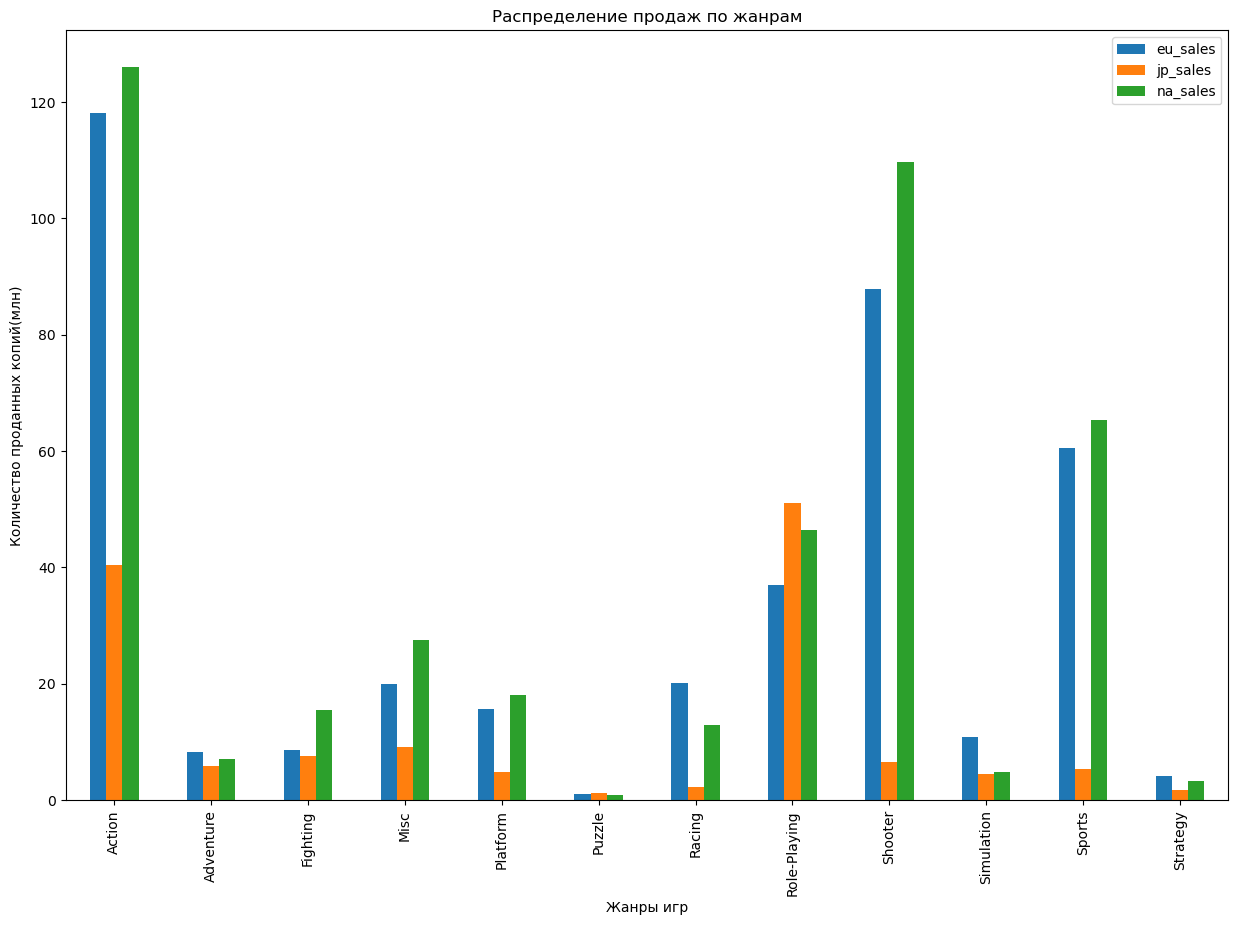

In [52]:
(data
 .pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
 .plot(kind='bar', figsize=(15, 10), xlabel='Жанры игр', ylabel='Количество проданных копий(млн)',
      title='Распределение продаж по жанрам')
)
plt.show()

In [53]:
data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [54]:
data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [55]:
data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


In [56]:
data.sort_values(by='total_sales', ascending=False).head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,nan,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,nan,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,nan,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,nan,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Комментарий**

Во всём мире, за исключением Японии, играют примерно в одно и то же. Основные продажи приходятся на ААА-проекты и какие-то эксклюзивы платформ. В Японии же своя особая атмосфера, они обожают JRPG, поэтому там ролевые игры на первом месте.
</div>
</div>

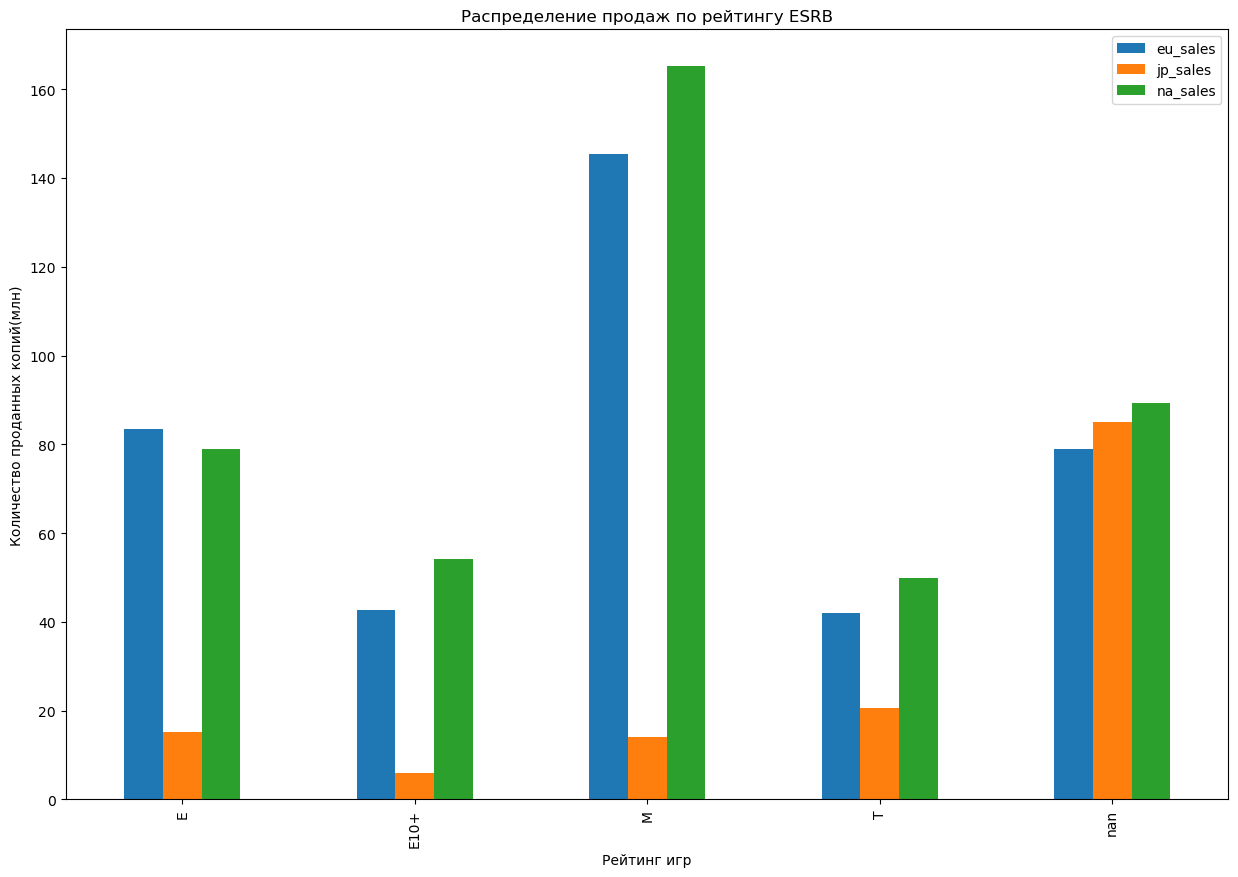

In [57]:
(data
 .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
 #.drop(labels='nan', axis=0)
 .plot(kind='bar', figsize=(15, 10), xlabel='Рейтинг игр', ylabel='Количество проданных копий(млн)',
      title='Распределение продаж по рейтингу ESRB') 
)
plt.show()

In [58]:
(data
 .pivot_table(index='rating', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 #.drop(labels='nan', axis=0)
)

,na_sales
rating,
M,165.21
nan,89.42
E,79.05
E10+,54.24
T,49.79


In [59]:
(data
 .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 #.drop(labels='nan', axis=0)
)

,eu_sales
rating,
M,145.32
E,83.36
nan,78.91
E10+,42.69
T,41.95


In [60]:
(data
 .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 #.drop(labels='nan', axis=0)
)

,jp_sales
rating,
nan,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Комментарий**

В Японии больше всего играют в игры, которые не имеют рейтинга. Может быть потому что они только на японском рынке популярны (те же JRPG) или какие-нибудь симмуляторы свиданий. А еще в Японии есть своя рейтинговая система CERO.
</div>
</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Промежуточный вывод**

Как видно, рейтинг не влияет на продажи в отдельных регионах.
    
Можно заметить только, что в Японии «T» («Teen») — «Подросткам» и «M» («Mature») — «Для взрослых» распределены не так, как в остальном мире. Это может быть связано с тем, что в Японии люди работают и перерабатывают больше, чем в остальном мире, поэтому у взрослых не хватает времени на игры.
</div>
</div>

### Проверяю гипотезы

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [61]:
alpha = .05
results = st.ttest_ind(data.loc[data['platform'] == 'XOne', 'user_score'],
                       data.loc[data['platform'] == 'PC', 'user_score'],
                       equal_var = False, nan_policy='omit')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.1475959401343032
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Комментарий**

Следовательно, мы не можем отвергнуть нулевую гипотезу, что говорит о том, что с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.
</div>
</div>

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports отличаются.

In [62]:
alpha = .05
results = st.ttest_ind(data.loc[data['genre'] == 'Action', 'user_score'].dropna(),
                       data.loc[data['genre'] == 'Sports', 'user_score'].dropna(),
                       equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  1.4460039700704315e-20
Нулевая гипотеза отвергнута


<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-info">

**Комментарий**

С большой долей вероятности средние пользовательские рейтинги Action и Sports отличаются, нулевая гипотеза отвергнута.
</div>
</div>

### Общий вывод

Заказчик интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно было выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Проблемы данных: большое количество пропусков в столбцах различных рейтингов, несоответствия типов данных в некоторых колонках. Пропуски в столбцах 'Critic_Score',	'User_Score', 'Rating' было решено оставить, т.к. заполнить их чем-то не получится. Строки, в которых отсутствует год выпуска('year_of_release') были удалены. Типы данных были изменены в соответствующих столбцах: 1)привидены столбцы с текстом к 'str'; 2)'year_of_release' привел к 'int', потому что года это целые числа; 3)'user_score' это числа(необязательно целые) от 0 до 10, поэтому 'float'.

Для решения поставленной задачи были взяты данные за 4 года, т.к. этот промежуток был выбран актуальным в результате исследования. Потенциально прибыльными платформами были выбраны Xbox One и PS4, можно обратить внимание еще и на PC и WiiU. Было установлено, что отзывы критиков об игре сильнее влияют на продажи, чем отзывы пользователей. Самыми прибыльными жанрами игр оказались шутеры, платформеры, спортивные симмуляторы, гонки и ролевые игры, также можно отметить игры жанра action, т.к. объем их производства и продаж самый большой. Отсюда следует, что в 2017 году нужно сделать ставку на игры, выходящие на платформах Xbox One и PS4 жанров шутеры, экшн, спортивные симмуляторы, гонки, ролевые игры и платформеры, которые будут высоко оценены критиками. Однако, следует учесть поправку на регионы, в Америке, скорее всего, лучше будут продаваться игры на xbox, а в Японии, скорее всего, наоборот. Также следует обратить внимание на то, что распределение популярных жанров в Японии отличается от остального мира.